In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Base_Files.ClassLevyJumpProcesses import TemperedStableSubordinator
import GPy
from Base_Files.Creating_the_NGP import GaussianProcess

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


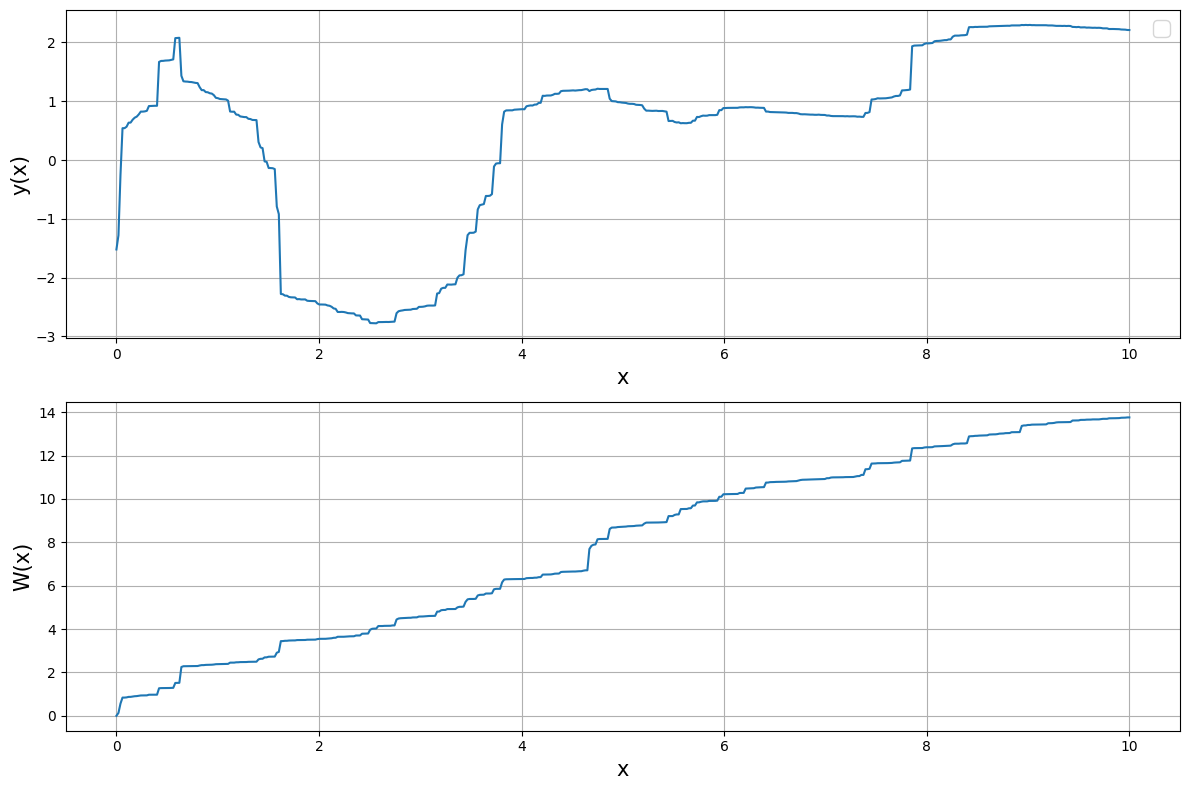

In [22]:
# Set Parameters
t1 = 0.0
t2 = 10.0

num_obs = 500 # (N) number of points e.g. size of data set
num_epochs = 2000
subordinator_truncation = 0.0
kappa = 0.5#0.2
delta = 2.1#1.2
gamma = 1.25#0.3
nProcesses = 1
l = 1

initial_sub = TemperedStableSubordinator(t1, t2, num_obs, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
X = initial_sub
Y = GaussianProcess(initial_sub, 1, num_obs).reshape(-1,1)

Xs = np.linspace(0.0, 10.0, num_obs).reshape(-1, 1)

fig, ax = plt.subplots(nrows=2, figsize=(12,8))

ax[0].plot(Xs, Y)
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('y(x)', fontsize=15)
ax[0].grid(True)
ax[0].legend(fontsize=15)

ax[1].plot(Xs, initial_sub)
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('W(x)', fontsize=15)
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [23]:
def log_likelihood(X, Y):
    kernel = GPy.kern.RBF(input_dim=1)
    sub_kernel = GPy.kern.Brownian(input_dim=1)
    model = GPy.models.GPRegression(X, Y, kernel*sub_kernel)
    log_likelihood = model.log_likelihood()
    return log_likelihood

num_iter = 1500
burn_in = 0

### Data Storage

In [24]:
data = dict()

data['accept_sub_samples'] = []
data['likelihood_samples'] = []
data['accept_likelihood_samples'] = []
data['alphas'] = []
data['accept_alphas'] = []


### Base Case

Acceptance rate: 1.4666666666666666 %
Number of accepted likelihood samples: 22
Accepted Likelihood samples: [-528.6082918701106, -525.4311350578964, -523.8473879691363, -516.7435342616207, -516.5426047308509, -516.4906925035863, -516.4274767911262, -517.5630362133877, -517.860067019047, -517.7242185080814, -518.8180241107332, -517.622559053637, -518.6099322743066, -518.3940539393172, -521.5525781844767, -520.0814773644036, -523.7575130204191, -520.6875538952993, -520.259782980838, -514.8770842674611, -515.2788297180293, -514.1907274379375]
Accepted Alphas: [6.9919780259794315, 23.978481217602198, 4.873181887625991, 1216.6466521867665, 1.2225386174323793, 1.0532832889006218, 1.06525660357147, 0.3212423609300497, 0.743021122753782, 1.1455083484965112, 0.3349394188876639, 3.305094470784399, 0.37255402405081245, 1.2409513894518136, 0.04248839729450826, 4.354025502588235, 0.025323165848388892, 21.54102217030656, 1.5338346613767646, 217.60874734660158, 0.6691510560343096, 2.9686350857441868

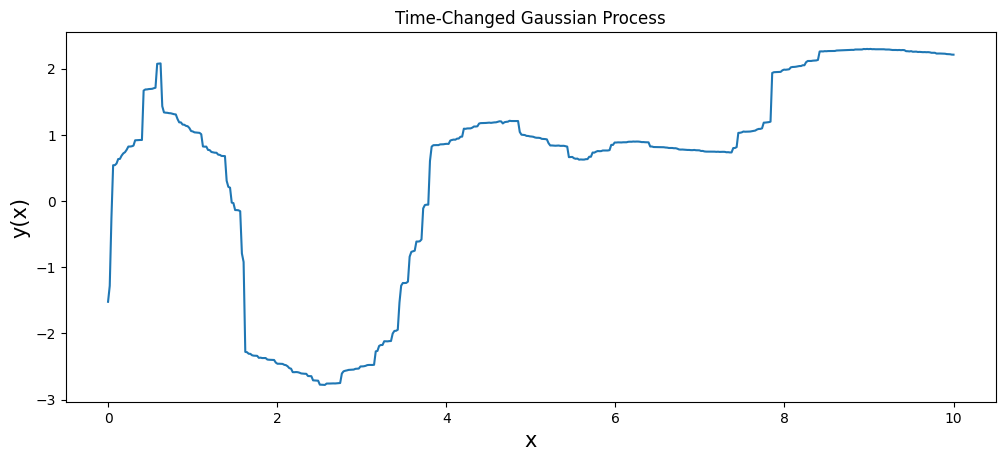

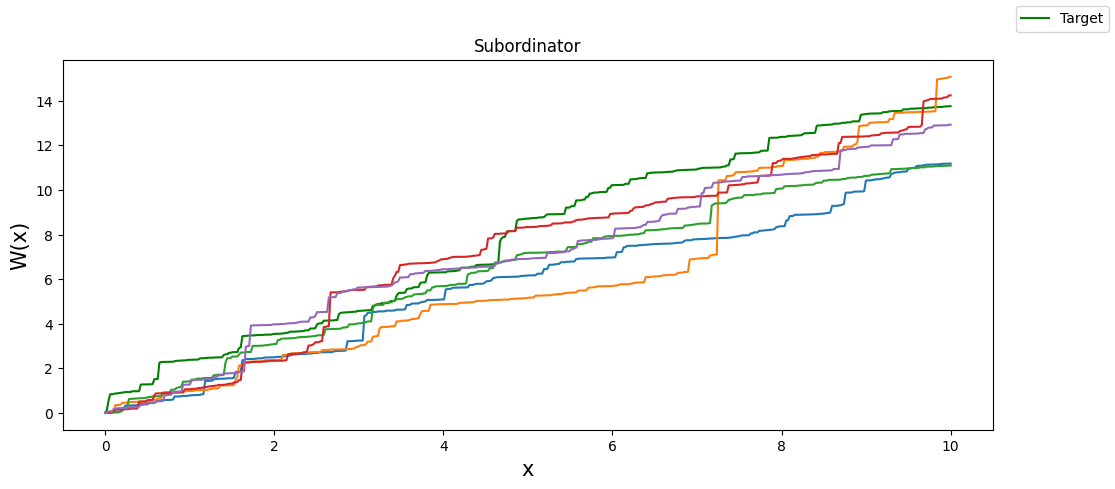

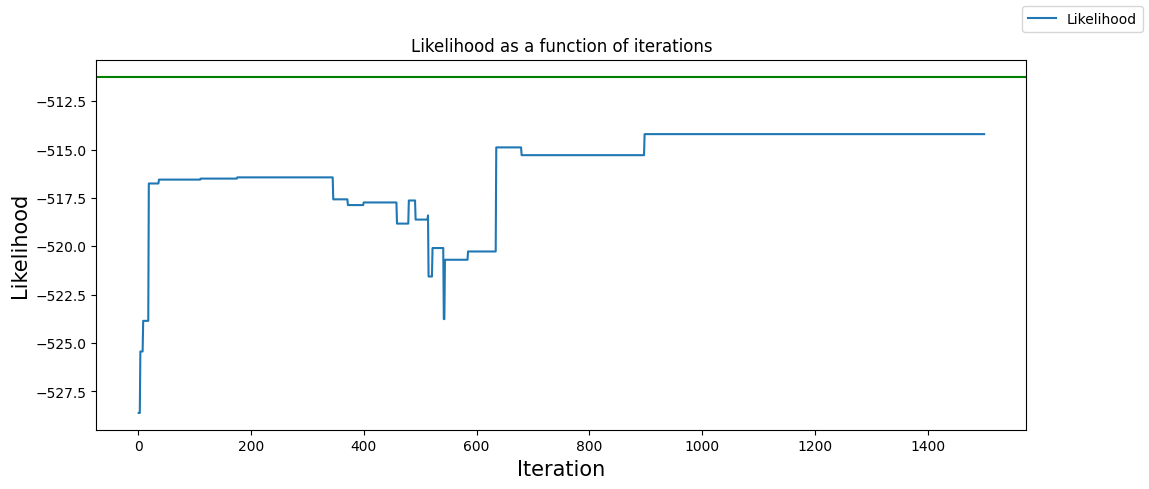

In [25]:
# Run the Metropolis-Hastings algorithm
t1 = 0.0
t2 = 10.0

N = 1

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
acceptances = 0

accept_sub_samples = []

likelihood_samples = []
accept_likelihood_samples = []

alphas = []
accept_alphas = []


for i in range(num_iter):
    # Draw a new proposal from the proposal distribution
#     print('Iteration:', i+1)

    new_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
    log_alpha = log_likelihood(new_sub, Y) - log_likelihood(current_sub, Y)
    alpha = np.exp(log_alpha)

    accept = np.random.uniform() < alpha
    alphas.append(alpha)


    if accept:
        current_sub = new_sub
        acceptances += 1
        accept_likelihood_samples.append(log_likelihood(current_sub, Y))
        accept_alphas.append(alpha)
        accept_sub_samples.append(current_sub)

    likelihood_samples.append(log_likelihood(current_sub, Y))        

# Print the acceptance rate
print('Acceptance rate:', acceptances*100 / num_iter, '%')
print('Number of accepted likelihood samples:', acceptances)
print('Accepted Likelihood samples:', accept_likelihood_samples)
print('Accepted Alphas:', accept_alphas)
print(log_likelihood(X, Y))


data['accept_sub_samples'].append(accept_sub_samples)
data['likelihood_samples'].append(likelihood_samples)
data['accept_likelihood_samples'].append(accept_likelihood_samples)
data['alphas'].append(alphas)
data['accept_alphas'].append(accept_alphas)


Xs = np.linspace(0, 10, int(num_obs/N))

plt.figure(1).set_figwidth(12)
plt.xlabel('x', fontsize=15)
plt.ylabel('y(x)', fontsize=15)
plt.title('Time-Changed Gaussian Process')
plt.plot(Xs, Y)

plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Target', color='green')
for i in range(1,6):
    plt.plot(Xs, accept_sub_samples[-i])
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()

plt.figure(3).set_figwidth(12)
plt.plot(np.linspace(1, len(likelihood_samples), len(likelihood_samples)), likelihood_samples, label='Likelihood')
plt.axhline(log_likelihood(X, Y), color='green')
plt.title('Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(3).legend()


plt.show()


### `Test`

0.0 1.0
Acceptance rate: 54.0 %
Number of accepted likelihood samples: 810
Accepted Likelihood samples: [-514.3666755470588, -513.984252502768, -513.5766747221437, -513.3938884881056, -513.754447811557, -514.2225477384889, -513.3937839253798, -514.2314251107736, -513.8096549502494, -513.2889077712346, -513.772627182112, -513.3564970506767, -514.4844439902257, -514.9038359063479, -514.1759920806575, -514.1278681740284, -513.5680983455454, -513.5095679594197, -513.1822565546164, -513.7887732514121, -513.6338712151901, -515.6106010431608, -516.7693982718299, -515.8664950629393, -514.5137652074651, -513.820399181631, -513.5847106235177, -516.1266771379006, -514.564479701557, -513.6193665926877, -513.7717918107728, -513.8184015550328, -513.8523758474395, -514.1492249031018, -513.9203986033359, -514.317444107522, -514.2497495643364, -514.1639228965776, -514.1061662869619, -514.8506729900184, -514.5033098756247, -513.5795881477494, -515.0091909788765, -514.194841310166, -515.184683619513, -51

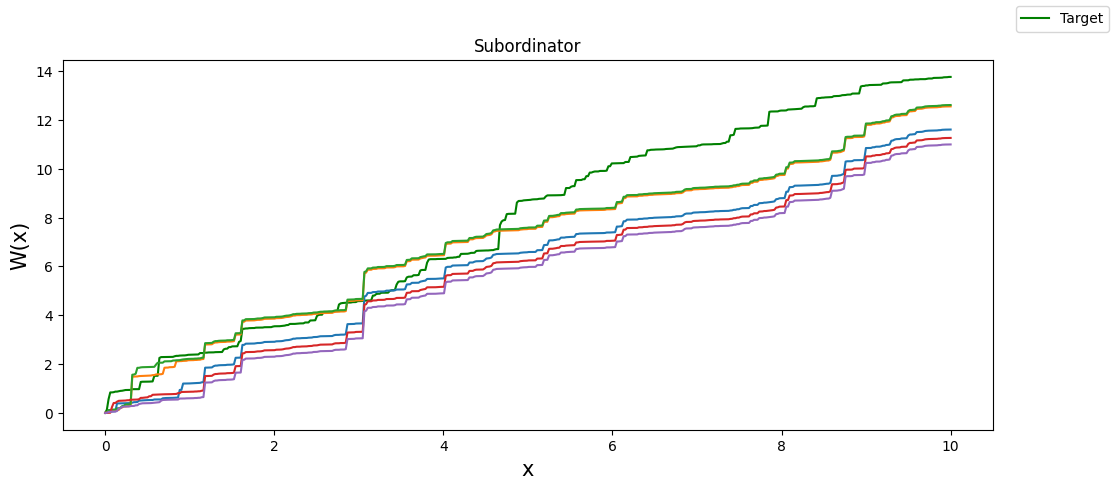

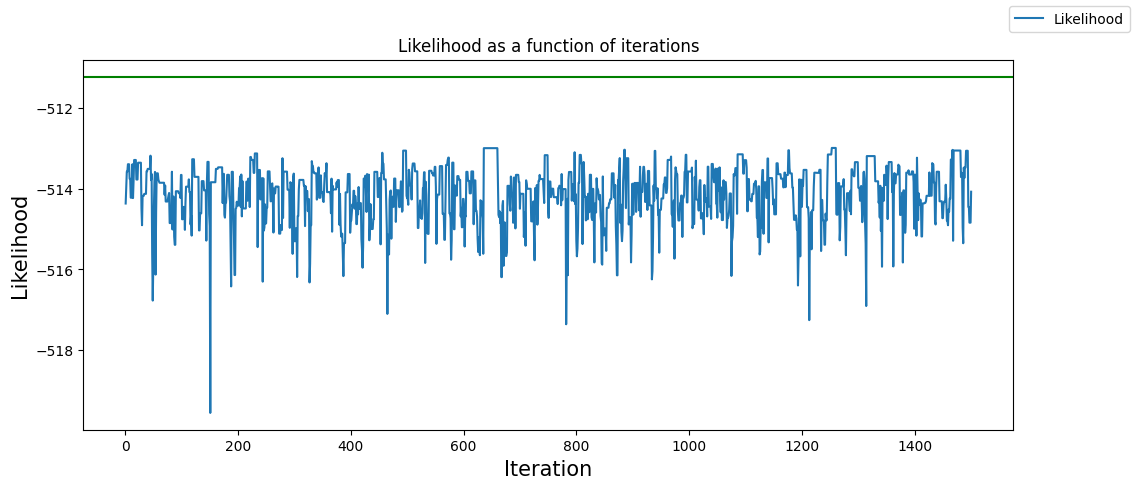

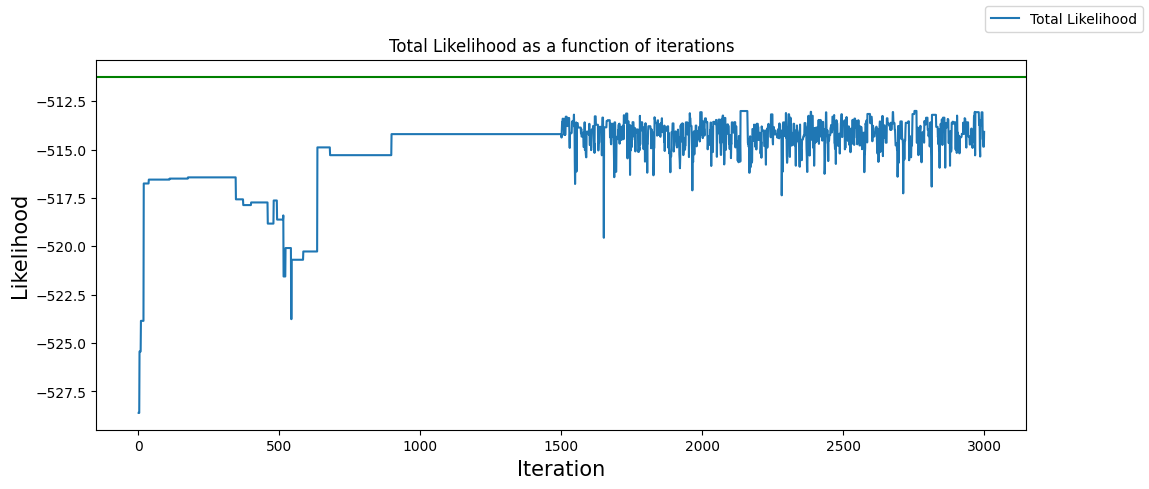

1.0 2.0
Acceptance rate: 12.866666666666667 %
Number of accepted likelihood samples: 193
Accepted Likelihood samples: [-514.8425534644484, -518.05140886049, -518.7479185634012, -516.8532430820408, -517.7532996859264, -513.5090194980385, -514.0611070231994, -515.2467732332449, -517.5722395710852, -516.3857180407567, -517.6931316814321, -515.9121454410257, -514.2396886385599, -516.3647017036539, -516.6253887211453, -517.5685359881838, -516.7627707099185, -513.8672199060275, -514.0119998186767, -514.7121446792836, -516.9099471909576, -514.5686420821928, -514.1771008274812, -516.2621417362707, -514.7933606060955, -516.1515119792734, -514.8310111440329, -515.105260662606, -516.9454677715653, -515.2749808924717, -514.6550656093456, -517.0627972243722, -517.0609080268374, -516.4534788164636, -515.8693203182194, -516.9612387271518, -514.4672959242072, -514.182943392923, -514.5336725915461, -514.0248852229297, -514.4877161605534, -513.7600336672183, -513.4263567161573, -516.5225344332715, -516.

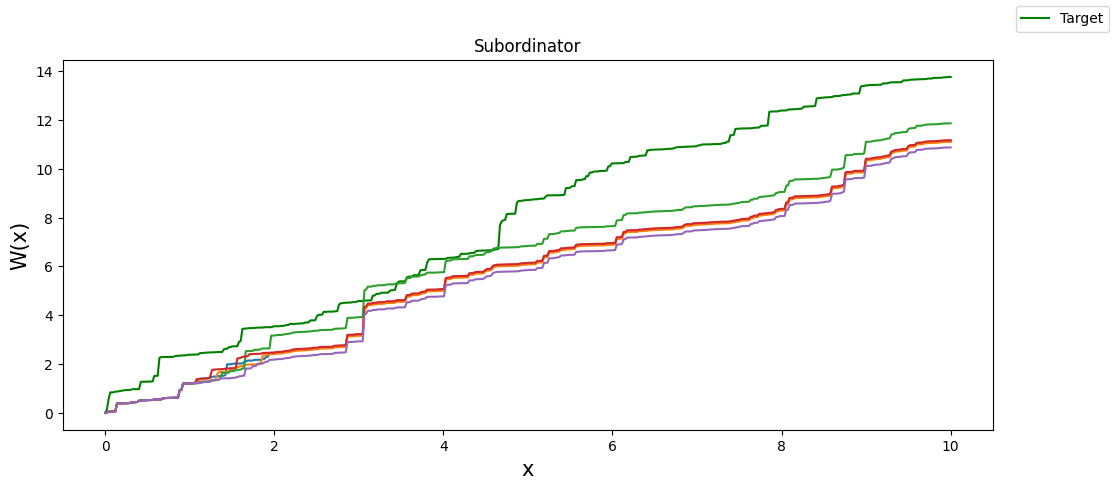

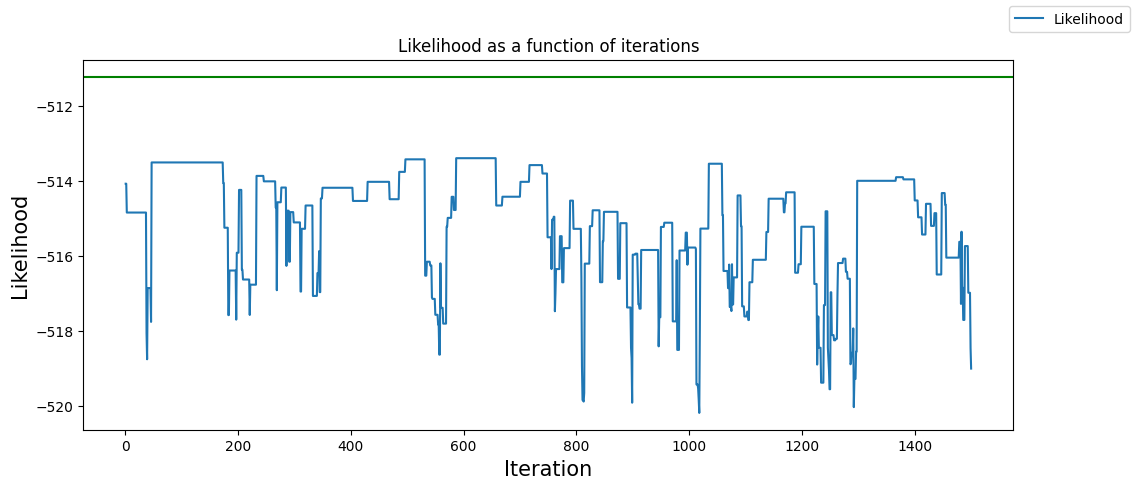

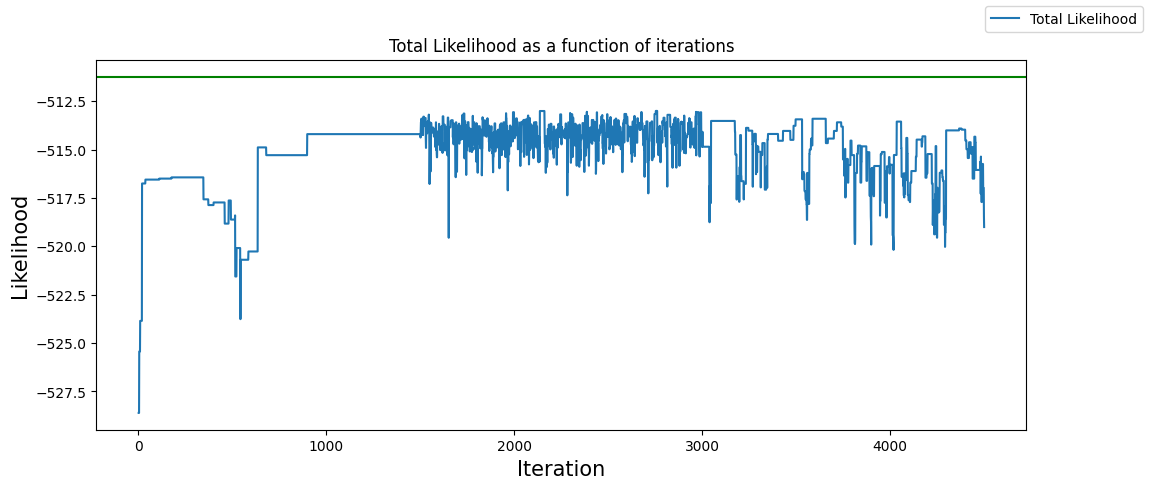

2.0 3.0
Acceptance rate: 41.2 %
Number of accepted likelihood samples: 618
Accepted Likelihood samples: [-518.7588376656374, -518.757496285529, -519.5610748058929, -520.4706406935137, -518.2672998801211, -519.6654725077046, -520.5683223232907, -518.5168043102539, -518.8626852087898, -521.1206539731149, -520.5448752491934, -520.726685099559, -518.3499023657266, -518.6427291673895, -519.9215328288335, -519.9452131603744, -518.5375562034818, -519.0362672554606, -520.135992978585, -519.6159246342465, -520.15798903868, -519.0884006024011, -519.915108277323, -519.3276616335434, -519.1861956078499, -519.2870992832486, -521.0680376049389, -519.4114597655596, -520.4263391251136, -520.4539005985765, -520.3335824520788, -519.8310725592087, -519.2549629436422, -519.0916717428341, -520.6813927293852, -520.6911817223056, -520.8389583889568, -519.416742784615, -519.1157509608265, -519.1661129344425, -520.0778703396035, -520.0731109120112, -521.3400370564755, -519.7549438878272, -519.2632983177613, -5

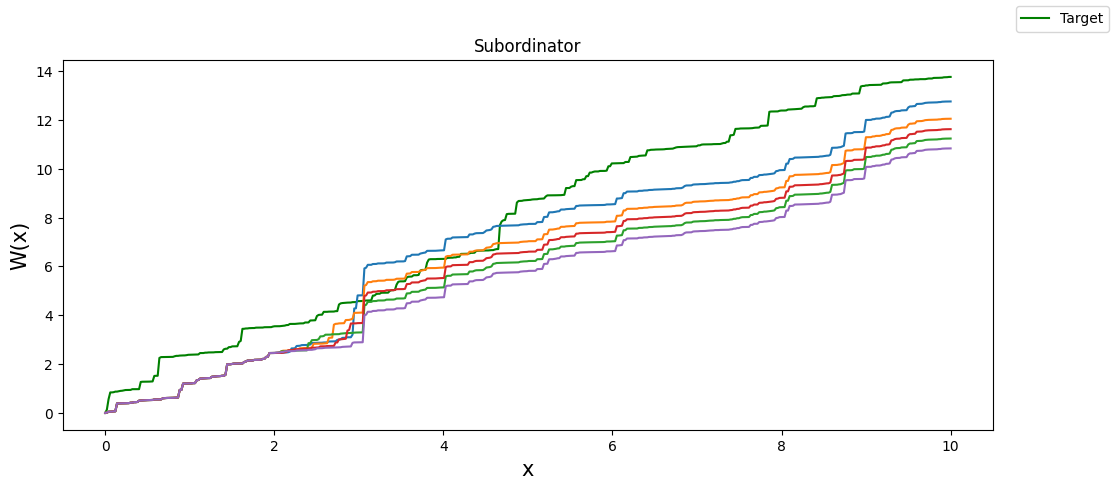

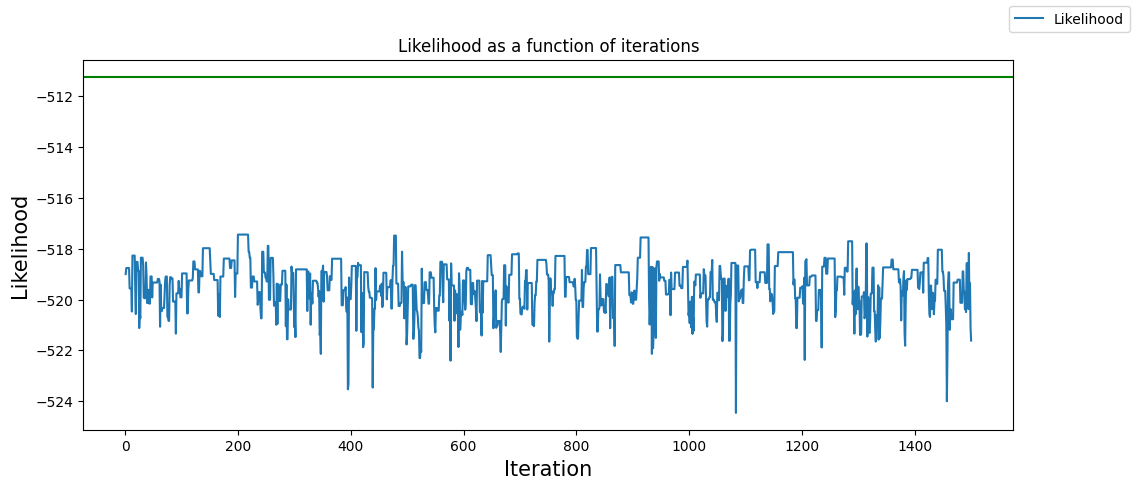

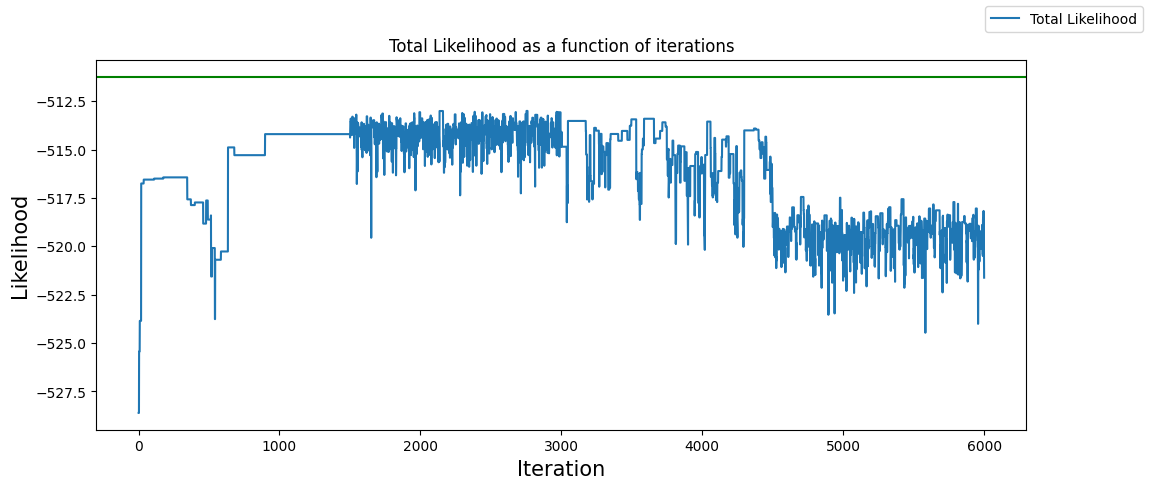

3.0 4.0
Acceptance rate: 39.666666666666664 %
Number of accepted likelihood samples: 595
Accepted Likelihood samples: [-522.9886834968784, -522.8619563177735, -521.3512048873562, -520.8623831494211, -522.6133794064373, -521.0737771281171, -519.778352626341, -521.1846247512553, -521.9473076843403, -521.1435613484534, -522.9680582771811, -522.4620341177387, -520.8700464685594, -521.047113214521, -522.9410754699743, -520.50585500757, -520.3741055966831, -521.6220074516134, -520.4351518203309, -520.5485992388334, -521.7077871501042, -522.5184251849674, -523.2327348181365, -522.9561218210464, -523.9757994584496, -522.5390756629087, -520.7573431114283, -522.2641455708156, -521.9590309904709, -521.039566326931, -521.1229020793077, -522.68942349418, -521.8048646223765, -520.6095594370704, -522.7051191894058, -520.0281907952254, -520.9581077639241, -520.4653327217544, -520.0721731559506, -520.0667160583228, -521.1076232188198, -521.9637568935863, -521.7769610676597, -522.522506558362, -524.5961

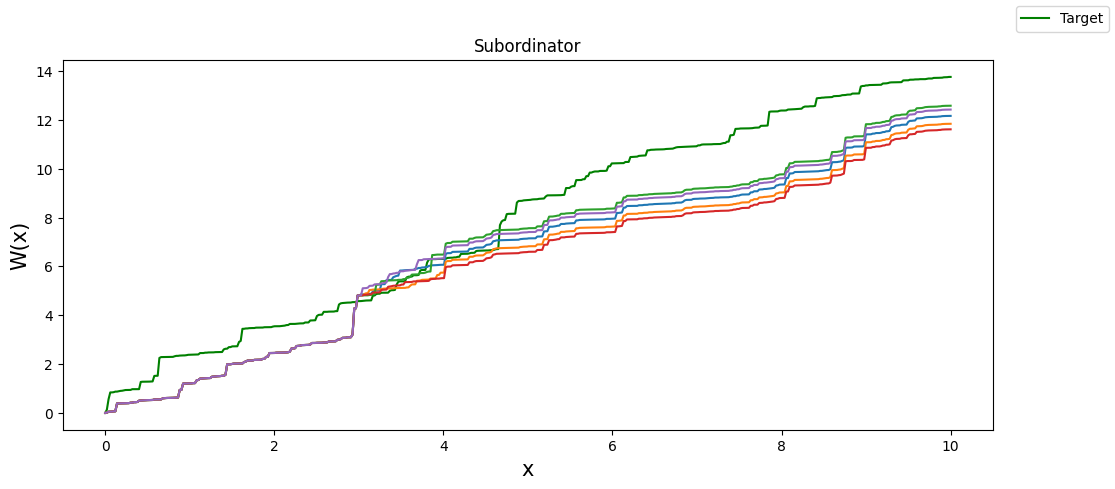

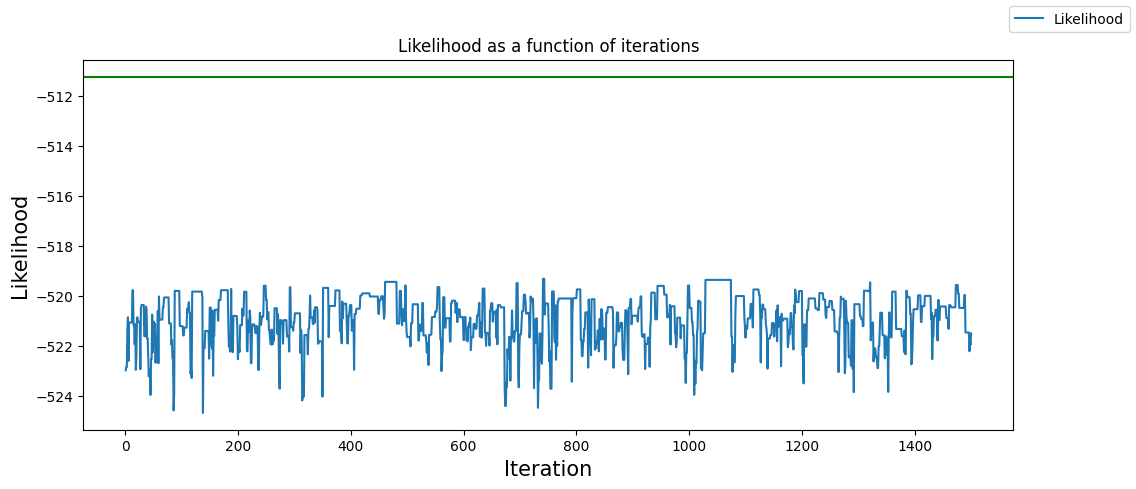

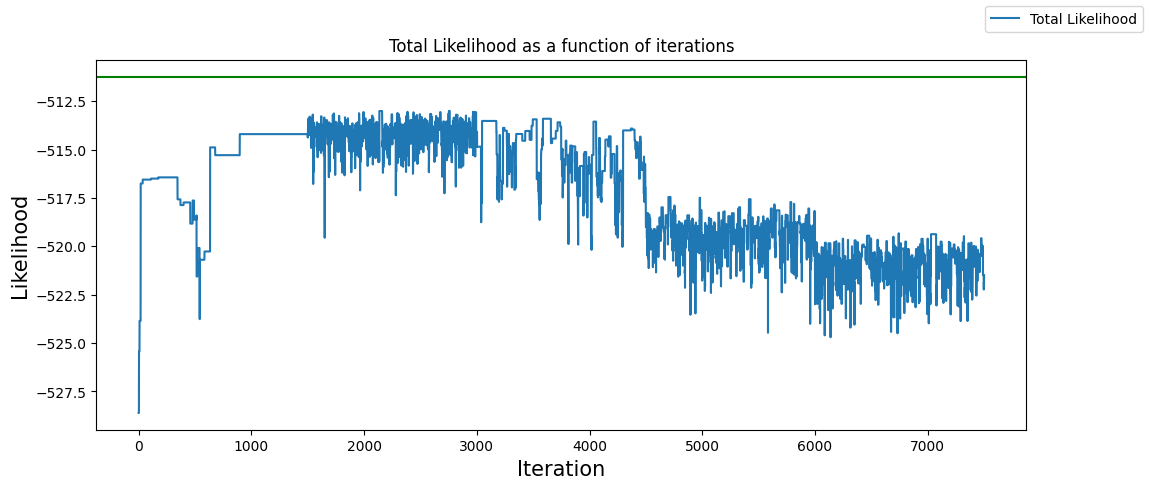

4.0 5.0
Acceptance rate: 44.13333333333333 %
Number of accepted likelihood samples: 662
Accepted Likelihood samples: [-520.9969771356875, -521.2627337243168, -519.9848532095142, -520.2484700817416, -522.7228494010936, -520.5793942044887, -522.2788069176335, -522.4040293558455, -521.0795667109954, -520.6058695715648, -521.0080955707891, -523.516597040266, -521.1158458274191, -520.9642566968291, -521.8628893244472, -523.5955784640516, -523.5154959289686, -523.0473803040461, -520.4840258973551, -521.0521217983528, -520.6791272094606, -520.152996174291, -520.6301725458605, -521.1956243539735, -521.2219603727748, -520.8036905293542, -521.0161134940417, -520.995074452208, -521.1744240979158, -522.251628309715, -521.8355787428786, -521.1654481177887, -520.7116788850221, -522.9336550534445, -521.5217182819152, -520.902558543303, -521.6081095037127, -522.3608668037084, -521.6505127413291, -521.5558530248165, -521.8053405167923, -521.7026872283078, -521.4371619162251, -521.955816671703, -522.257

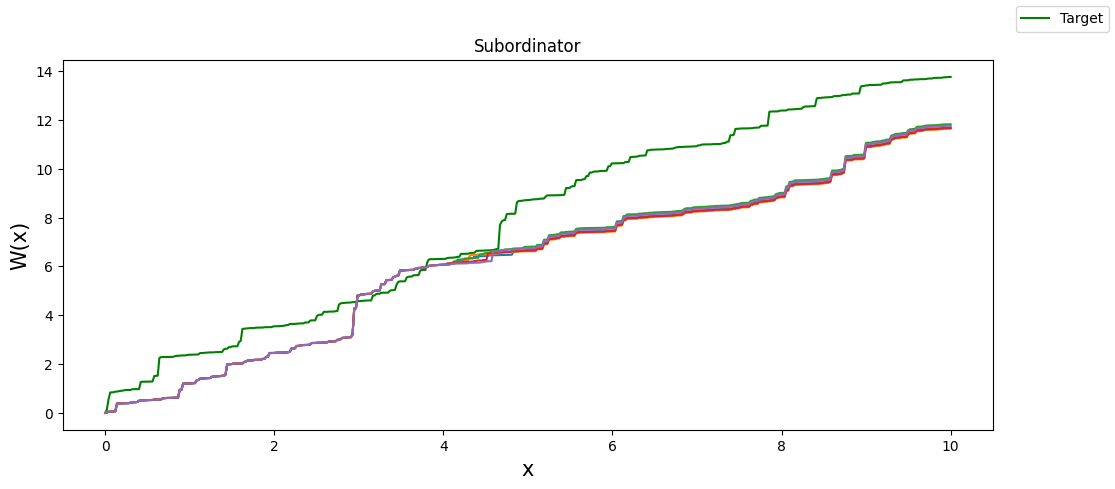

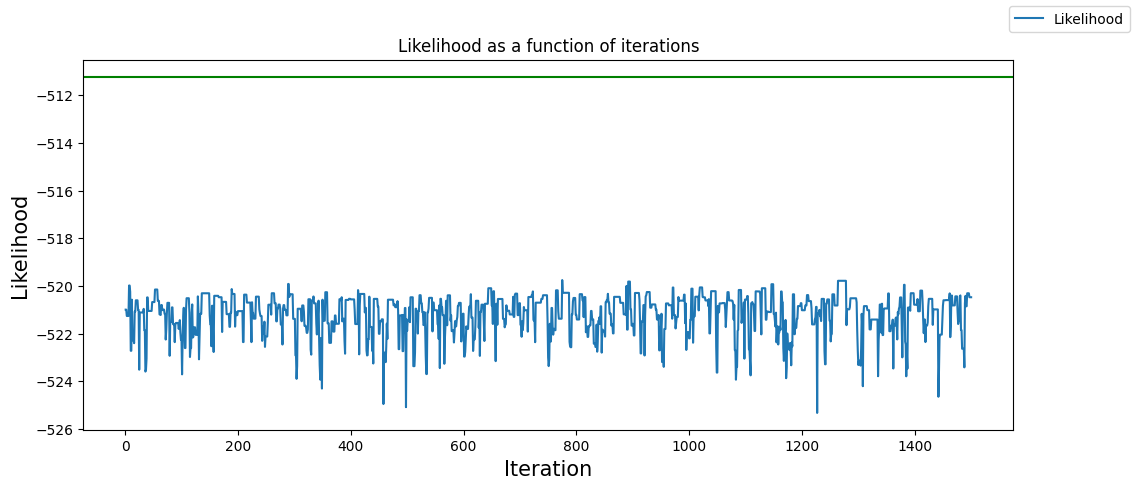

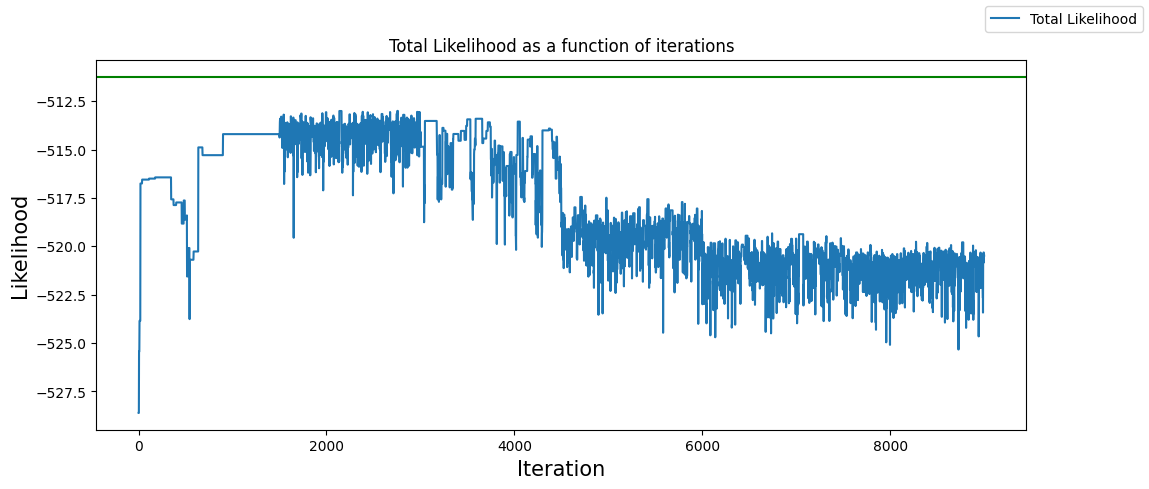

5.0 6.0
Acceptance rate: 43.4 %
Number of accepted likelihood samples: 651
Accepted Likelihood samples: [-520.0061949443606, -521.3224130452351, -521.1683253241879, -520.0121893138293, -519.5897458969656, -521.3997291600234, -520.2167552306247, -521.8130255655676, -521.6180453072765, -521.5516392741914, -520.360957548067, -519.4862394867654, -520.0158094954809, -520.1212931679272, -520.9188597277001, -520.0006347489983, -519.3418287838465, -520.5272102151497, -520.3392416697764, -522.3755187176297, -520.8984364620513, -521.4042581883713, -521.8774170907121, -520.3175776005027, -520.2429669194571, -520.4275908661637, -519.6244706001625, -520.9802486044076, -520.8366264780773, -520.6677644747485, -520.6446012871005, -520.5762572099042, -521.2280696923274, -520.9416736387176, -520.4271539593799, -521.0456201229586, -523.9077631249135, -522.2533521237997, -521.734842676802, -521.4829826860728, -521.016260478264, -521.7128919794462, -520.1375706638519, -520.5226759834071, -520.5948703265963

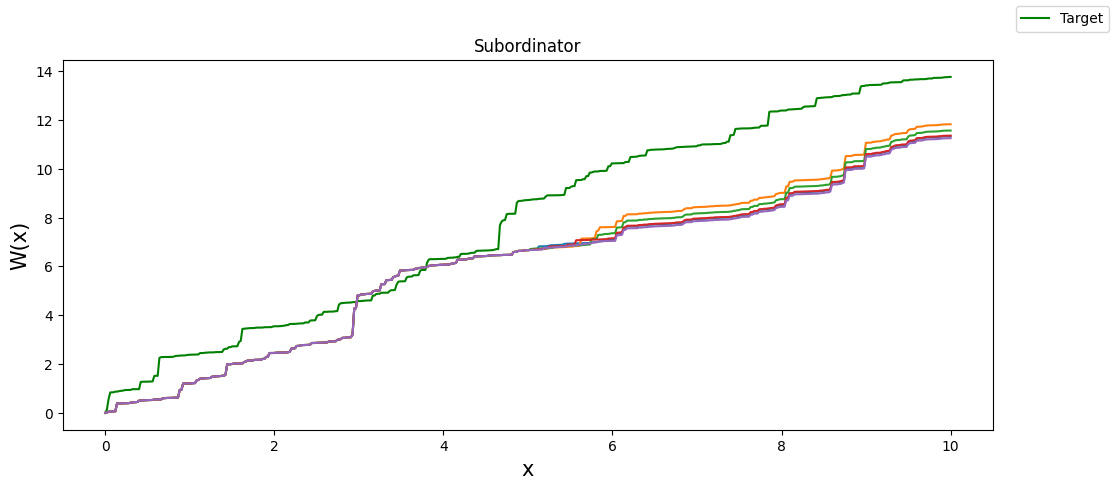

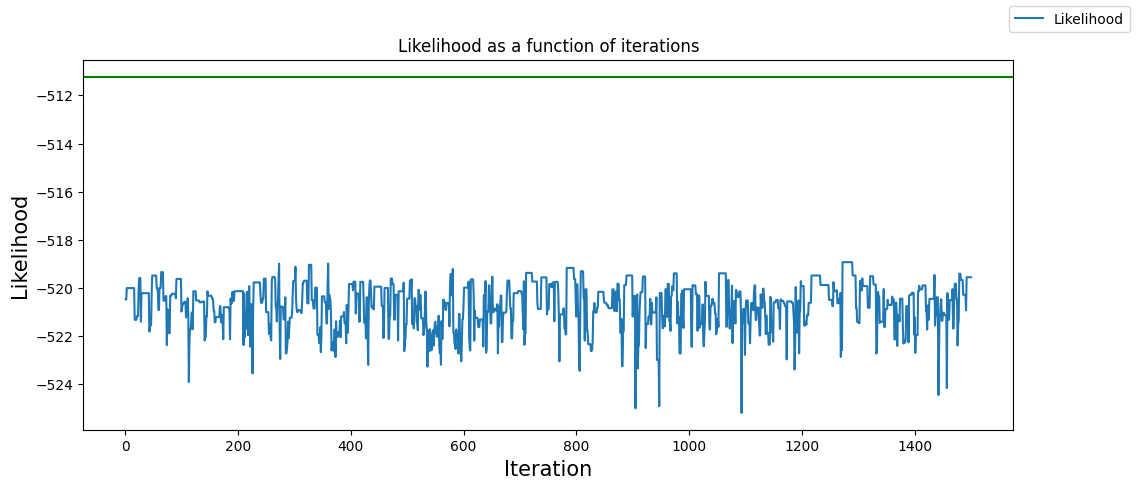

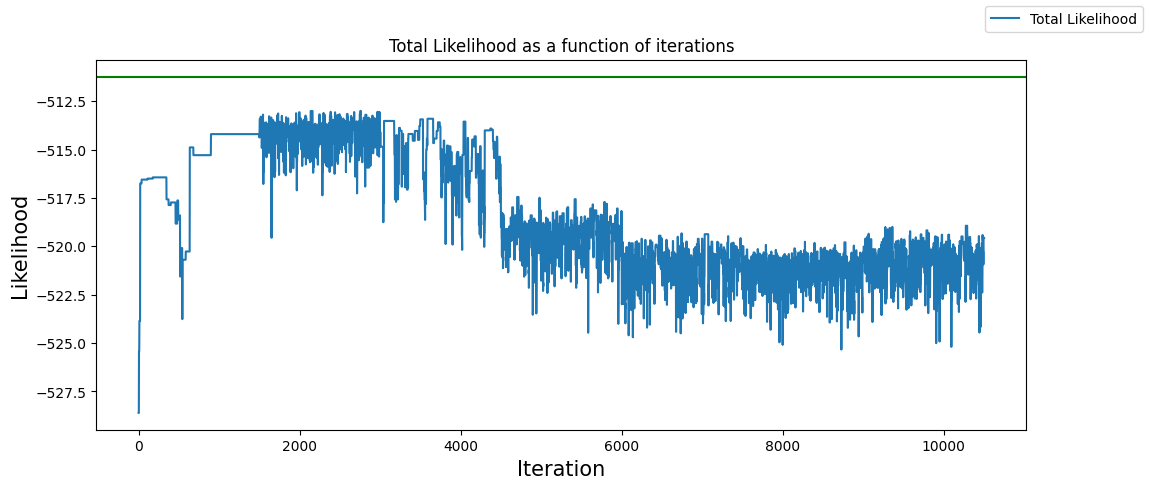

6.0 7.0
Acceptance rate: 36.53333333333333 %
Number of accepted likelihood samples: 548
Accepted Likelihood samples: [-518.6486080116758, -518.7484407076164, -519.8549668420698, -519.6084832797673, -519.587527802031, -518.7715628671825, -519.0798045587594, -517.7886481235998, -520.1315482562004, -519.472406336275, -519.8241963315843, -520.9902659354709, -520.5198831595022, -520.1175926595083, -521.6594333498163, -521.1075139979018, -520.1749573301403, -519.4386785118875, -520.3820561632879, -519.3507355862631, -519.0187815026202, -520.2189839805799, -520.8105016440196, -522.1654349662956, -522.9934235475644, -520.8632344186565, -519.6956774619418, -519.3358660790218, -519.0942832897853, -518.7912011958988, -519.987508052973, -519.1674433643967, -519.6919999197288, -519.0073270591785, -521.1014601399945, -518.8052429913745, -521.0674727328928, -522.6344788594498, -520.3465840893406, -521.4627951297588, -520.7771092316902, -521.4453222849194, -519.2823686944132, -520.3190382049161, -521.

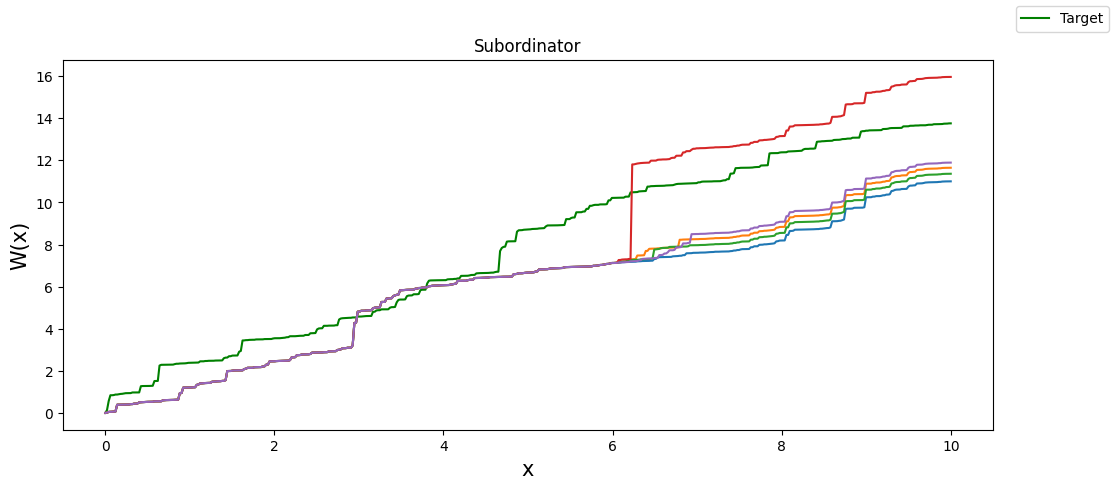

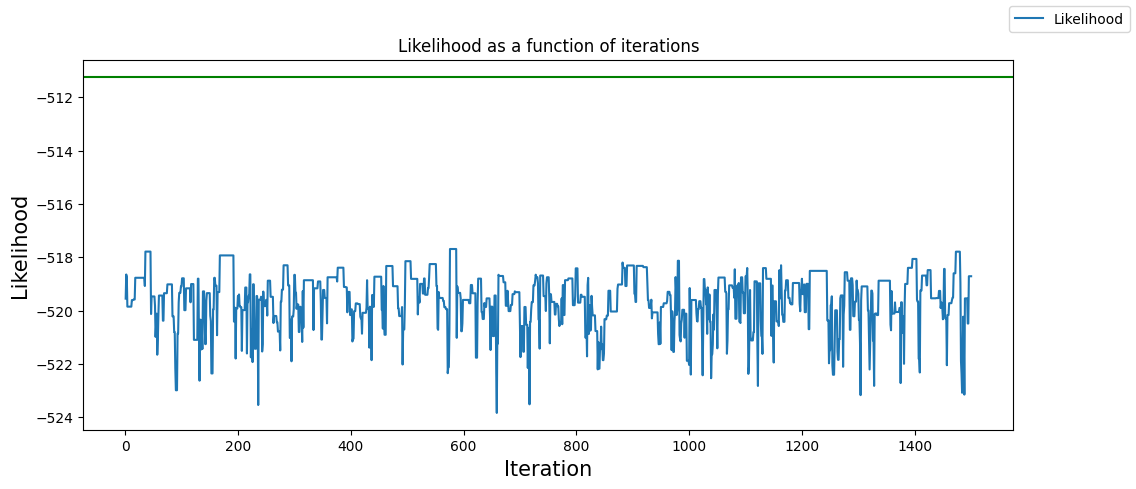

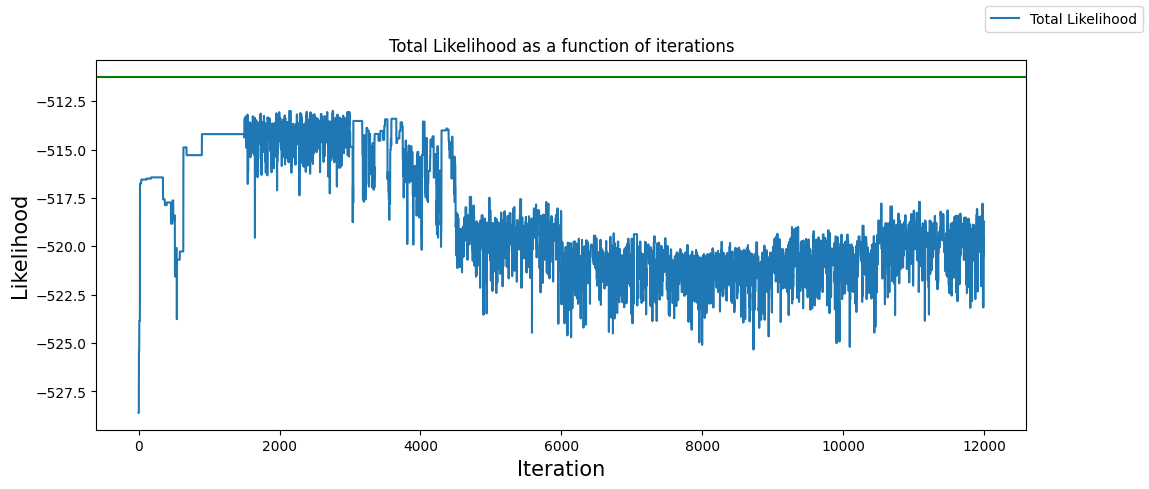

7.0 8.0
Acceptance rate: 44.6 %
Number of accepted likelihood samples: 669
Accepted Likelihood samples: [-518.4180059031925, -521.4886049040942, -521.9208393373686, -521.6369663947911, -518.8290727180331, -519.210148745431, -519.098439759232, -519.5177283996638, -519.5753607710263, -520.7784613578339, -521.5361354904445, -520.4299272777589, -519.88816949279, -520.0495348259024, -519.2783283518696, -520.8654258352608, -521.6188450344254, -522.1160981655139, -519.5151619497796, -519.3792624398266, -518.9074290462765, -522.819286523321, -518.5421134550353, -519.4038978056478, -520.5006731080896, -520.0615419518551, -520.1576608177345, -519.5847203894627, -519.6273395560322, -519.2615548973256, -519.3192147608423, -520.4539810804818, -519.7559762225519, -519.0945093316299, -518.7654474777219, -519.2264349923853, -519.2884062148943, -521.0958026505309, -519.9417552948576, -518.7231366707193, -519.2527139054675, -518.9802096305289, -519.6498046367947, -519.407330350259, -520.6277960831421, -

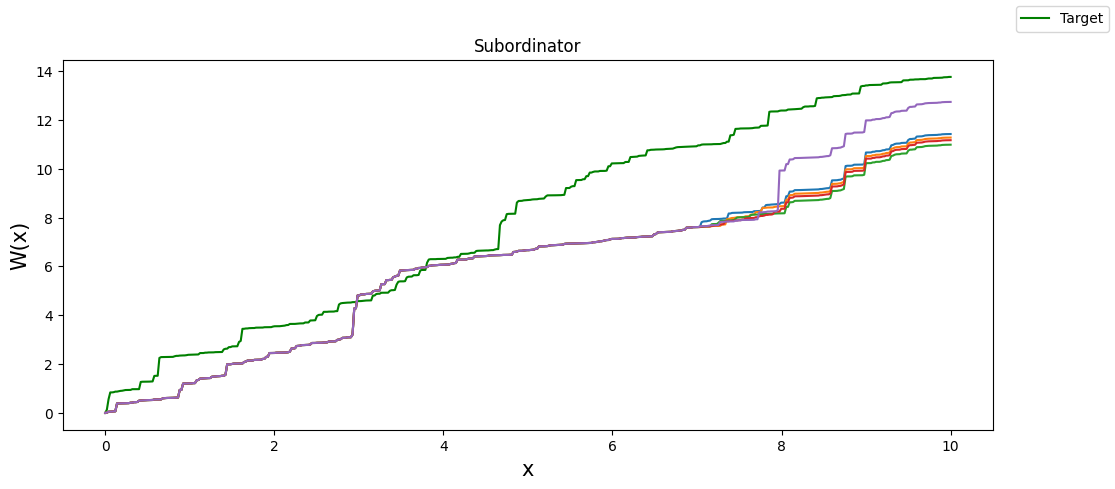

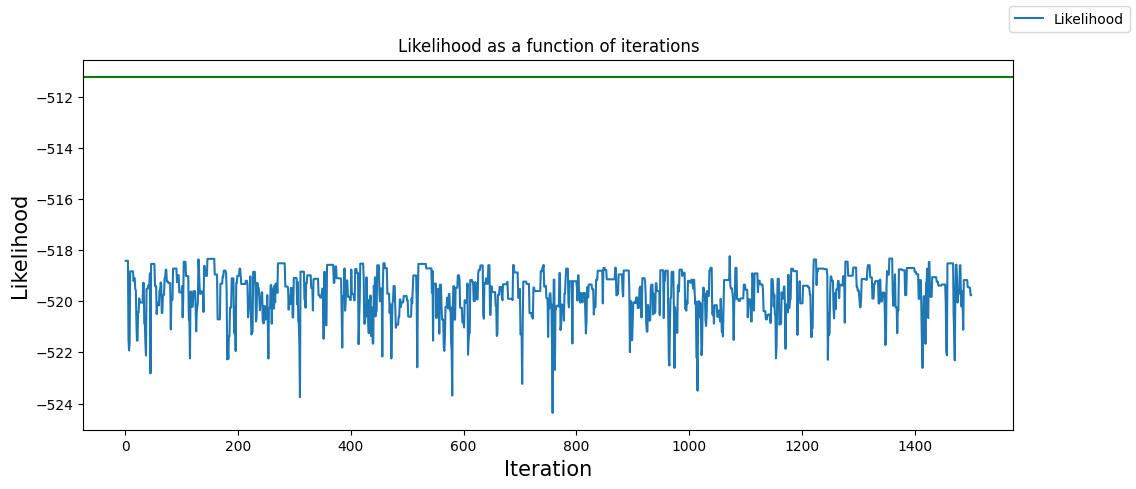

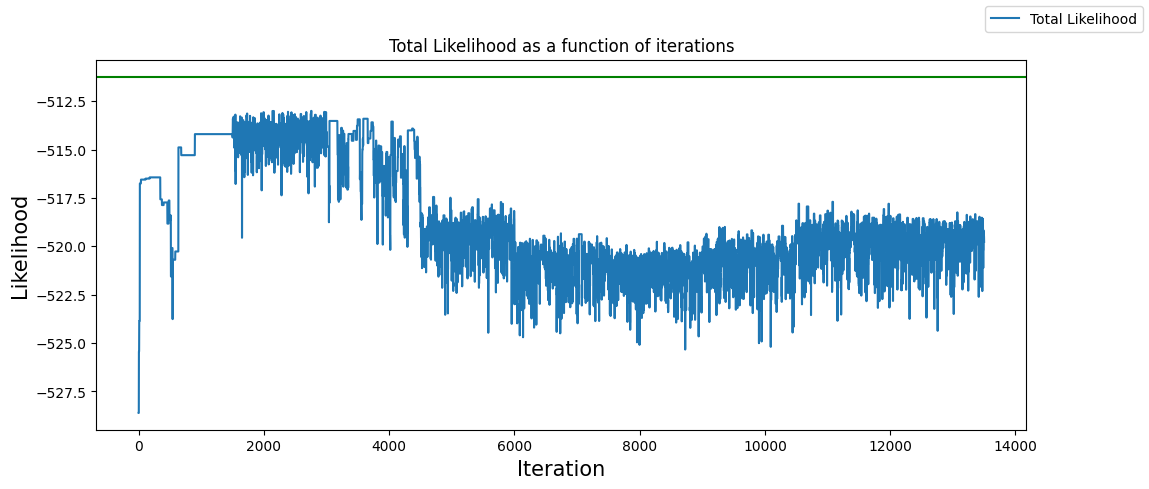

8.0 9.0
Acceptance rate: 35.93333333333333 %
Number of accepted likelihood samples: 539
Accepted Likelihood samples: [-518.9772584643443, -517.4180075083373, -518.0164230827974, -520.6478070039246, -519.2350193890496, -519.0077576705436, -518.115685252654, -517.6813132938134, -517.0528997414729, -516.7196563374299, -518.2412574222429, -517.7464429032445, -516.4048677019072, -518.589377297331, -516.4956440028423, -515.4599995701788, -516.2099701520393, -515.9039458845518, -516.8149117135094, -516.4917646495537, -517.6466069129979, -518.2203083275688, -518.3545069895739, -517.7015615212359, -519.150888170029, -516.8467661009998, -515.3901645267342, -517.6474532680658, -516.484615799245, -517.1483372513072, -517.2364841360384, -519.1154672953983, -517.8196391058426, -517.9893561436684, -518.5380449983516, -517.8593260590366, -518.8820750695755, -516.8951875758656, -516.9749921258945, -517.0919202668299, -518.3203716417229, -517.2973368002866, -519.4709327551877, -515.2820485516687, -516.4

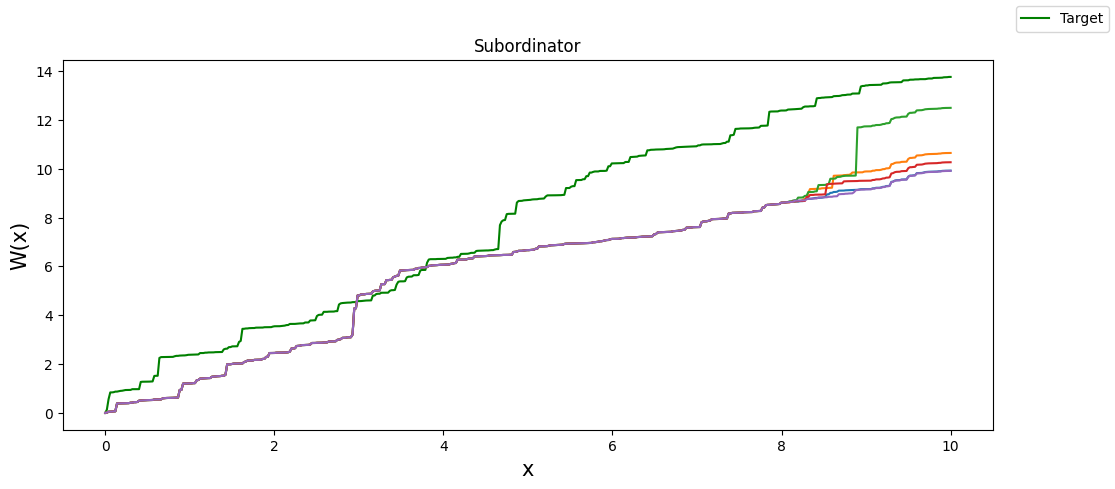

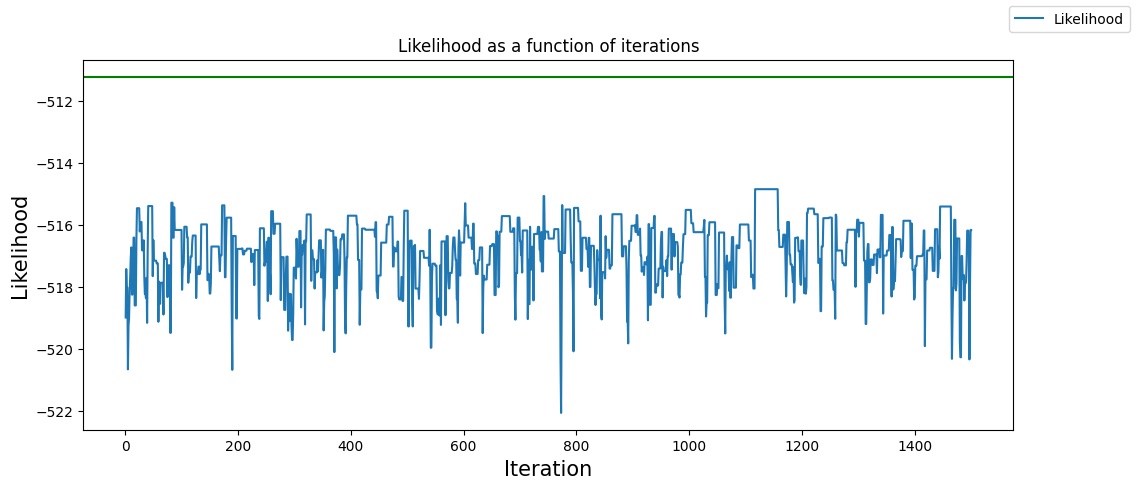

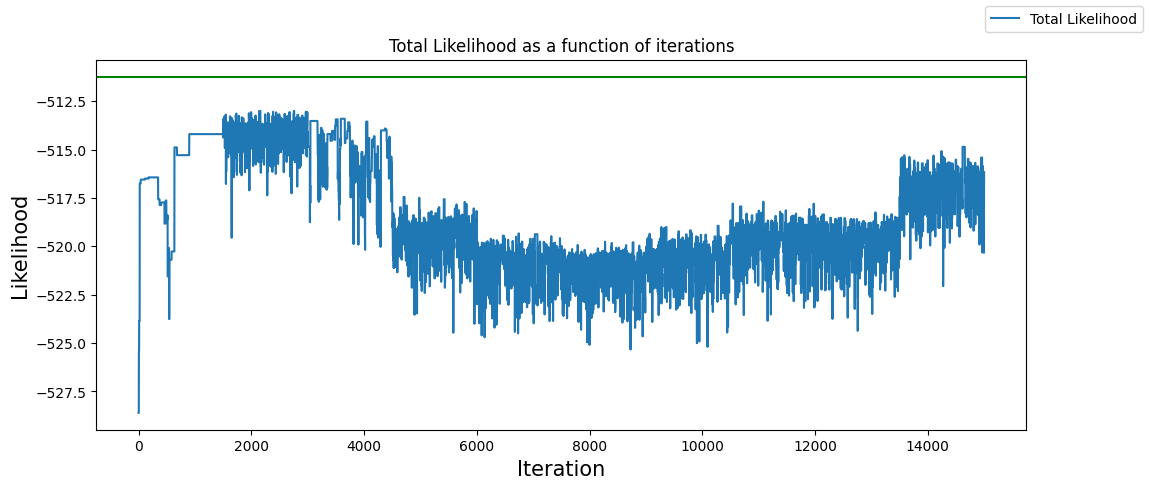

9.0 10.0
Acceptance rate: 41.86666666666667 %
Number of accepted likelihood samples: 628
Accepted Likelihood samples: [-515.793958632871, -515.092844516647, -516.4534637248674, -517.2820561011837, -516.0294857970915, -516.2196248920355, -516.597643050516, -516.4124425658028, -514.9435013448646, -516.5899822170243, -516.3331060992934, -515.9335745989312, -515.0376224305147, -515.7939606916093, -515.2686468728775, -515.509290496273, -517.1548226376914, -516.861659004285, -517.7976122839887, -516.2282443043217, -516.185637905827, -516.6960134229062, -516.9095662496627, -517.2366823078122, -516.9896904878303, -517.3188362411189, -516.443562483436, -516.6620672513421, -516.0939818311925, -516.9569071874187, -517.2620513700817, -517.3868472418106, -516.290771906125, -516.9135222812185, -515.196979292224, -515.0592489741588, -515.0155580578796, -514.6932239021381, -516.4000657120539, -517.6340660930678, -518.0476081437927, -515.8143501802563, -516.5867872245435, -516.4768273782322, -516.29029

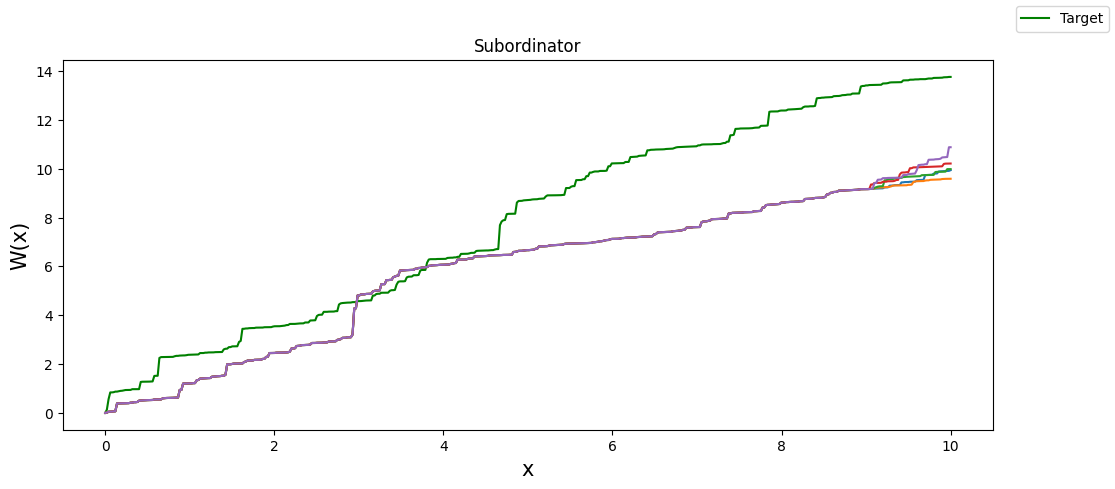

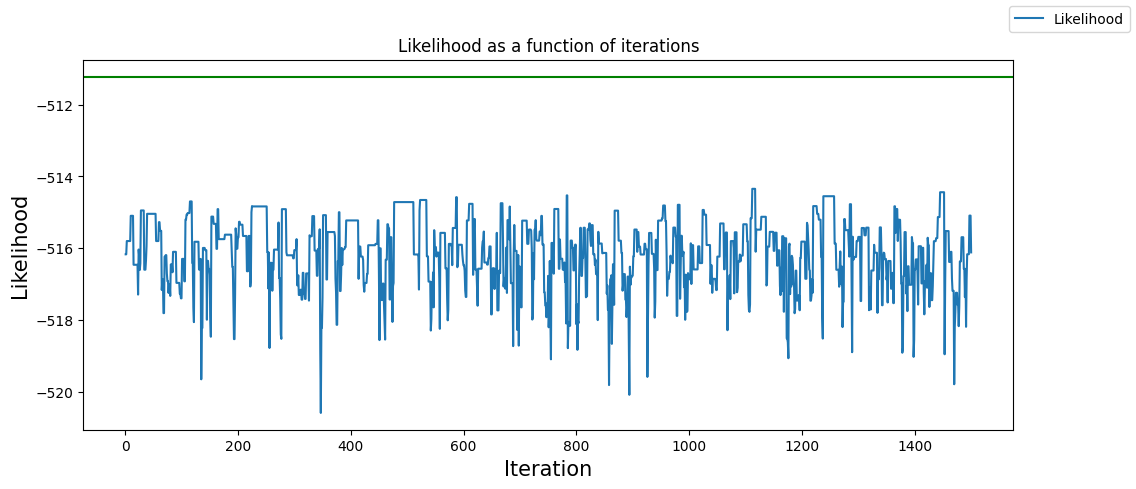

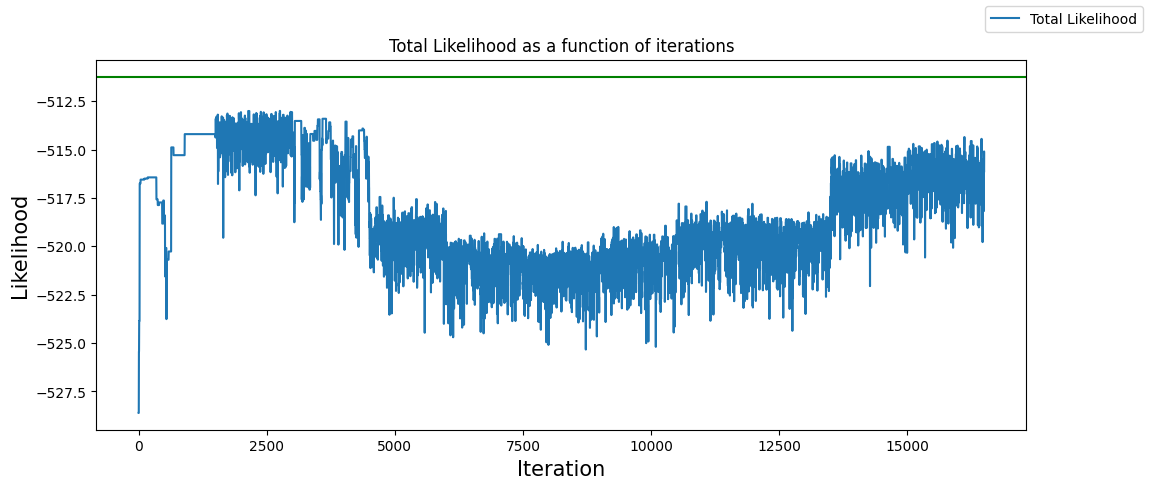

In [26]:
# Run the Metropolis-Hastings algorithm
N = 10
steps = 10.0/N
obsv_increment = int(num_obs/N)


for n in range(N):
    t1 = n*steps
    t2 = (n+1)*steps
    
    print(t1,t2)
    #num_obs/N values
    current_sub = accept_sub_samples[-1]

    acceptances = 0
    accept_sub_samples_test = []
    likelihood_samples = []
    accept_likelihood_samples = []
    alphas = []
    accept_alphas = []


    for i in range(num_iter):

        new_sub = TemperedStableSubordinator(t1, t2, obsv_increment, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)

        diff_1 = accept_sub_samples[-1][n*int(num_obs/N)]
        if n == N-1:
            diff_2 = 0
        else:
            diff_2 = new_sub[-1] - accept_sub_samples[-1][(n+1)*obsv_increment]
        
        curr_part = new_sub + diff_1 
        next_part = accept_sub_samples[-1][(n+1)*obsv_increment:] + diff_2 + diff_1
        prev_part = accept_sub_samples[-1][:n*obsv_increment]
        
        new_sub = np.concatenate((prev_part, curr_part, next_part))

        log_alpha = log_likelihood(new_sub, Y) - log_likelihood(current_sub, Y)
        alpha = np.exp(log_alpha)

        accept = np.random.uniform() < alpha
        alphas.append(alpha)
        
        if accept:
            current_sub = new_sub
            acceptances += 1
            accept_likelihood_samples.append(log_likelihood(current_sub, Y))
            accept_alphas.append(alpha)
            accept_sub_samples_test.append(current_sub)

        likelihood_samples.append(log_likelihood(current_sub, Y))
            
    accept_sub_samples = accept_sub_samples_test


    # Print the acceptance rate
    print('Acceptance rate:', acceptances*100 / num_iter, '%')
    print('Number of accepted likelihood samples:', acceptances)
    print('Accepted Likelihood samples:', accept_likelihood_samples)
    print('Accepted Alphas:', accept_alphas)
    print(log_likelihood(X, Y))


    data['accept_sub_samples'].append(accept_sub_samples)
    data['likelihood_samples'].append(likelihood_samples)
    data['accept_likelihood_samples'].append(accept_likelihood_samples)
    data['alphas'].append(alphas)
    data['accept_alphas'].append(accept_alphas)


    Xs = np.linspace(0, 10, int(num_obs))

    plt.figure(1).set_figwidth(12)
    plt.plot(Xs, initial_sub, label='Target', color='green')
    for i in range(1,6):
        plt.plot(Xs, accept_sub_samples[-i])
    plt.title('Subordinator')
    plt.xlabel('x', fontsize=15)
    plt.ylabel('W(x)', fontsize=15)
    plt.figure(1).legend()

    plt.figure(2).set_figwidth(12)
    plt.plot(np.linspace(1, len(likelihood_samples), len(likelihood_samples)), likelihood_samples, label='Likelihood')
    plt.axhline(log_likelihood(X, Y), color='green')
    plt.title('Likelihood as a function of iterations')
    plt.xlabel('Iteration', fontsize=15)
    plt.ylabel('Likelihood', fontsize=15)
    plt.figure(2).legend()

    total_likelihood = []
    for temp in data['likelihood_samples']:
        total_likelihood += temp

    plt.figure(3).set_figwidth(12)
    plt.plot(np.linspace(1, len(total_likelihood), len(total_likelihood)), total_likelihood, label='Total Likelihood')
    plt.axhline(log_likelihood(X, Y), color='green')
    plt.title('Total Likelihood as a function of iterations')
    plt.xlabel('Iteration', fontsize=15)
    plt.ylabel('Likelihood', fontsize=15)
    plt.figure(3).legend()

    plt.show()